# Lecture04 - Wave dynamics 
<div class="alert alert-block alert-success">
<b>Learning Objectives:</b> linear wave theory (Airy waves), deep vs shallow water waves, dispersive or non-dispersive for deep vs shallow water waves, wave group speed and phase speed for deep vs shallow water waves, wave refraction, wave shoaling, wave breaking depth, wave breaker types
</div>

Before class:
- watch TedEd ["The physics of surfing - Nick Pizzo"](https://www.youtube.com/watch?v=5nCcE-jABSo)

After class:

- Assignment03.ipynb (due 09/25/2025 23:59PM)
- read about [Tsunami wave propagation](https://www.noaa.gov/jetstream/tsunamis/tsunami-propagation), note that the wave length of a Tsunami wave is much larger than the water depth! Estimate the propagation speed of a Tsunami wave in the open ocean (~4000 m) using the shallow water Airy wave theory your self!

Reference:

- Textbook chapter 4, skip 4.3.2
- optional: Textbook 4.4.2; BS 5.2

## 1. Wave theory
<!-- ![source: ](../figures/lecture04/wave_forms.png) -->

<img src="../figures/lecture04/wave_forms.png" width="600">

**Airy wave theory**: Airy (1845) developed a theory for irrotational
waves travelling over a horizontal bottom in any
depth of water. The wave profile is assumed to
be perfectly sinusoidal and only linear equations
are necessary to describe the water surface
and orbital motion hence it is often termed 
**linear wave theory** in comparison to the other
higher-order theories. It further assumes that
the **water surface slope is small**, and that the
**water depth is much greater than the wave
amplitude** (hence it is also described as small amplitude
wave theory).

The assumptions for Airy wave theory generally hold in describing regular
waves in deep water but, as water depth
decreases, the assumptions about slope and the
relationship between wave height and water
depth are increasingly violated. Higher-order theories such as **Stokes' second-order
theory** becomes more adequate.

### 1) Dispersion Relation
Recall that **Wave dispersion** refers to the phenomenon where the phase velocity of a wave changes with its frequency or wavelength.  **Dispersion Relation** connects mathematically the wave frequency $\sigma$ and wavelength $k$. Since by definition, phase speed $c=\sigma/k$, the dispersion relation also connects phase speed with frequency/wavelength.

**Dispersion Relation for Airy waves** is:
> $\sigma^2 = gk \tanh (kh)$,\
where $h$ is the water depth

or substituting the identities $\sigma=2\pi/T$ and $k=2\pi/L$, 
> $L=\frac{g}{2\pi}T^2\tanh(\frac{2\pi h}{L})$

In [1]:
# %%capture

# # Install necessary packages and restart the kernel.
# !pip install numpy
# !pip install matplotlib

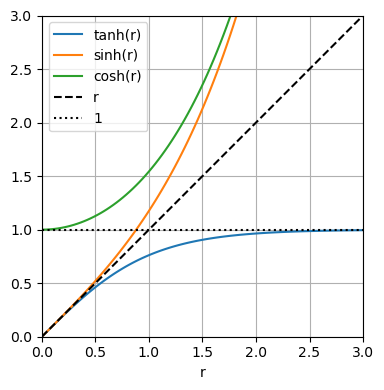

In [2]:
# The above equation is hard to salve since L is on both side of the equation
# However, tanh(r) can be approximated when r is very small or very large
# which allows us to simplify the above equation
# let's look at a tanh function since together

# import python libraries
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

# define r from 0 to 3
r = np.linspace(0,3,100)

# plot tanh(r)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
ax.plot(r, np.tanh(r), label = 'tanh(r)')
ax.plot(r, np.sinh(r), label = 'sinh(r)')
ax.plot(r, np.cosh(r), label = 'cosh(r)')
ax.plot(r, r, 'k--', label = 'r')
ax.plot(r, np.ones(r.shape), 'k:', label = '1')
ax.set_xlabel('r')
ax.set_ylabel('')
ax.set_aspect(1)
ax.set_xlim([0,np.max(r)])
ax.set_ylim([0,np.max(r)])
ax.legend()
ax.grid(True)
plt.tight_layout()

The above graph suggest that as $r=kh=2\pi h/L$ becomes large, $\tanh(2\pi h/L)\approx 1$, so that
> $L_\infty = \frac{g}{2\pi}T^2$\
> $\sigma_\infty = \sqrt{gk}$\
> $c_\infty=\frac{gT}{2\pi}$

The subscript $\infty$ is used here to denote this as the **deep-water approximation**, so-called because of the assumption that $h$ is large compared with the wave length. 

<div class="alert alert-block alert-warning">
<b>Class Discussion:</b> Let's now derive **shallow-water wave approximation** together!
</div>

When $h$ is small compared with the wave length, $\tanh(2\pi h/L)\approx 2\pi h/L$, so that
> $L_s = T\sqrt{gh}$\
> $\sigma_s = k\sqrt{gh}$\
> $c_s=\sqrt{gh}$

In contrast to the **deep-water** condition where the wave length and phase velocity depend only on the **wave period**, in **shallow water** the primary dependence is on the **water depth**!

### 2) Shallow water vs deep water waves

#### a. Wave theory

The regions of application of the approximations: 
|   |  | 
| :------- | :------: |
|Deep water  | $h/L_\infty>1/2$|
|Intermediate water | $1/4>h/L_\infty>1/20$|
|Shallow water | $h/L_\infty<1/20$|

The **Airy wave theory** also provides a description of the water-partical movement at depth beneath the surface and the trajectories of the partical paths. The genral form of orbital horizontal velocity of water partical and horizontal orbital diameter are 
> $u=\frac{\pi H}{T}\frac{\cosh(k(z+h))}{\sinh(kh)}\cos(kx-\sigma t)$\
> $s=H\frac{\cosh(k(z+h))}{\sinh(kh)}$

where $H=2a$ is the wave height.\
At the bed:
> $u(z=-h)=\frac{\pi H}{T\sinh(kh)}\cos(kx-\sigma t)$\
> $s(z=-h)=\frac{H}{\sinh(kh)}$

For deep water wave ($kh>>1$):
> $u_\infty(z=-h)\approx 0$\
> $s_\infty(z=-h)\approx 0$

For shallow water wave ($kh<<1$):
> $u_s(z=-h)\approx \frac{\pi H}{Tkh}\cos(kx-\sigma t)$\
> $s_s(z=-h)\approx \frac{H}{kh}$

We can use the relations $c=L/T$ and $c_s=\sqrt{gh}$ to reduce to number of unknowns in $u_s(z=-h)$ and $s_s(z=-h)$. After some algebra:
> $u_s(z=-h)\approx \frac{H}{2}\sqrt{\frac{g}{h}}\cos(kx-\sigma t)$\
> $s_s(z=-h)\approx \frac{HT}{2\pi}\sqrt{\frac{g}{h}}$

<!-- ![source: ](../figures/lecture04/wave_orbital.png) -->

<img src="../figures/lecture04/wave_orbital.png" width="600">

#### b. Revisit sea and swell

Recall phase speed of deep water waves $c_\infty = \frac{gT}{2\pi}$. This suggests that the wave celerity increases with the wave period, the longer-period wave travel the fastest as they leave the area of generation. Sea waves generated within a storm area are a superposition of many waves that have a range of periods and heights. As these waves propogate away from their generation site, they sort themselves out by period, this process is termed **wave dispersion**, as this is the primary factor in converting irregular **sea** into a regular **swell** where ther waves have a specific period or a very narrow range of periods. 

Let's read a [<font size="5">surf forecast</font>](https://www.surf-forecast.com/breaks/Breachway/forecasts/latest) together and
<div class="alert alert-block alert-warning">
<b>Class Discussion:</b> Discuss how the periods of the second, third, etc., swells compare to that of the first swell.
</div>


### 3) Wave energy

The energy in water waves is made up of two components:

(1) **Kinetic energy** associated with the orbital
motion of the water particles;

(2) **Potential energy** resulting from displacement
of the water surface away from the mean sea level.

According to Airy wave theory, if potential
energy is determined relative to the mean sea level and all
waves are propagated in the same direction, the
two energies are equal, and the total energy per
unit crest width (unit: J/m) is given by

> $E = E_k + E_p = \frac{\rho gH^2L}{16} + \frac{\rho gH^2L}{16} = \frac{\rho gH^2L}{8}$

The energy per unit area, or energy density, $\overline{E}$ (unit: J/m$^2$) is given by

> $\overline{E} = \frac{E}{L} = \frac{\rho gH^2}{8}$

The rate at which energy is transmitted in the
direction of wave propagation is the energy
flux $P$ (sometimes called wave power, unit: J/(m s)), and is
given by

> $P = \overline{E}c_g$,

where $c_g$ is the group veolcity.

## 2. Revisit Dispersion Relation for Airy Wave

Recall

> **Dispersion Relation for Airy waves**: $\sigma^2 = gk \tanh (kh)$, where $h$ is the water depth

,

> $c = \sigma/k$ (phase speed)
> $c_g = \frac{\partial\sigma}{\partial k}$  (group speed)

and
> non-dispersive wave: **$c=c_g$**
> dispersive wave: **$c\neq c_g$**

<div class="alert alert-block alert-warning">
<b>Class Discussion:</b> Discuss whether Airy waves are dispersive. What about waves in the shallow and deep water limits?
</div>

From the dispersion relation, we find that in deep water, energy is propagated
at one half of the speed of an individual
wave ($c_{g\infty}=c_{\infty}/2$). In shallow water, the rate of energy
propagation is equal to the wave celerity ($c_{gs}=c_s/2$).

## 3. Wave Refraction and Diffraction

### 1) Wave Refraction

When a wave approaches underwater contours at an angle, it is evident that the sections
of the crest in the deeper parts travel faster than those in the shallower sectors.
This causes the **wave crest to turn towards the depth contour**. This bending effect
is called refraction, and is analogous to similar phenomena in physics (light, sound).

<!-- ![source: ](../figures/lecture04/snells_law.png) -->

<img src="../figures/lecture04/snells_law.png" width="800">

Snell’s law:
> $\frac{sin𝜑_2}{𝑐_2}=\frac{sin𝜑_1}{𝑐_1}$


If the wave rays
**converge**, there is an **accumulation of energy** and relatively **high wave heights** can be
expected. In contrast, if wave rays diverge, the energy is spread over a larger part of
the wave crest, so the wave height is reduced.

<!-- ![source: ](../figures/lecture04/wave_refraction.png) -->

<img src="../figures/lecture04/wave_refraction.png" width="600">


### 2) Wave Diffraction

If obstructions to the wave propagation (an offshore island, a breakwater, a headland)
or abrupt changes in the bottom contours are present, there is a large (initial) variation
of wave energy along a wave crest, which leads to **transfer of energy along the wave
crests**. This phenomenon is called diffraction.

Figure 5.7 shows the diffraction of an
incident wave train in case there are no depth changes. A part of the wave front is
blocked by the breakwater and is reflected seaward. The remainder of the wave front
will bend around the obstacle and thus penetrate into the zone in the lee of the obstacle
(shadow zone). The diffracted wave crests will form concentric circular arcs with the
wave height decreasing along the crest of each wave.

<!-- ![source: ](../figures/lecture04/wave_diffraction.png) -->

<img src="../figures/lecture04/wave_diffraction.png" width="600">

<!-- ![source: ](../figures/lecture04/diffraction_example.png) -->

<img src="../figures/lecture04/diffraction_example.png" width="600">


## 4. Wave Shoaling and Breaking 

### 1) wave shoaling

Recall that the energy flux $P$ is the rate at which
energy is transmitted in the direction of wave propagation across a vertical plane perpendicular
to the direction of wave propagation and extending over the entire depth. This value can relate the wave heights at two arbitrary locations:

> $P=P_0 \rightarrow \overline{E}c_g = \overline{E_0}c_{g0}$

since $\overline{E} = \frac{\rho gH^2}{8}$,

> $P=P_0 \rightarrow H^2c_g = H_0^2c_{g0}$
 
or 

> $\frac{H}{H_0} = \sqrt{\frac{c_{g0}}{c_g}}$


The shoaling factor $K_{sh} = \frac{H}{H_0}$ is 1.0 in deep water,
then decreases slightly with water depth to 0.91 and subsequently rises to infinity. In
reality the wave height increase in the shoaling zone is limited by dissipation due to
wave-breaking.

<!-- ![source: ](../figures/lecture04/wave_shoaling.png) -->

<img src="../figures/lecture04/wave_shoaling.png" width="800">

### 2) wave breaking

#### a. breaking depth

Section 5.2.2 demonstrated how shoaling would increase the wave height until infinity,
at least in the absence of a physical limit to the steepness of waves. A wave crest
becomes unstable and starts breaking when the particle velocity exceeds the velocity
of the wave crest (the wave celerity). This breaking condition corresponds to a crest
angle of about 120° (see Fig. 5.9).

<!-- ![source: ](../figures/lecture04/wave_breaking_angle.png) -->

<img src="../figures/lecture04/wave_breaking_angle.png" width="600">

According to Miche (1944), in **deep water**, when **$H_{max}/L>1/7$**, the crest angle exceeds its maximum and the steepness-induced wave-breaking (called white-capping) occurs. 

In **shallow water**, when **$H_{max}/h>0.88$**, wave breaks. $\gamma = H/h$ is the breaker index. The breaker index shows that in the shallow nearshore zone wave-breaking of individual
waves starts when the wave height becomes greater than a certain fraction of
the water depth. This is called **depth-induced breaking**, since the limiting wave height
is governed by a water depth limitation. The maximum wave height $H_{max}$ in a
wave record is equal to 2$H_S$. The maximum value of $H_S/h$ for which the largest waves
are breaking is therefore about 0.4~0.5.

<div class="alert alert-block alert-warning">
<b>Class Discussion:</b> Consider a deep-water wave height $H_S$ = 1.5 m and a wave period of $T$ = 5 s.
We find $L_\infty = \frac{g}{2\pi}T^2 = 39$ m, and $H_S/L_\infty$ = 0.04. Under these conditions, even for the higher waves in the record, little white-capping is expected.
</div>

<!-- <img src="../figures/lecture04/wave_breaking.png" width="600"> -->

#### b. breaker type

Depending on the wave properties and the **angle of the bed slope**, the process of breaking
takes place in various different ways.

<!-- ![source: ](../figures/lecture04/wave_breaker_type.png) -->

<img src="../figures/lecture04/wave_breaker_type.png" width="800">

<!-- ![source: ](../figures/lecture04/spillingwave.gif) -->

<img src="../figures/lecture04/spillingwave.gif" width="600">
(source: https://www.surfertoday.com/surfing/the-four-types-of-breaking-waves)

**Spilling breakers** are usually found along flat beaches. These waves begin breaking
at a relatively great distance from shore and break gradually (over a distance of 6
to 7 wavelengths) as they approach progressively shallower water. During breaking,
a foam line develops at the crest and leaves a thin layer of foam over a considerable
distance. There is very little reflection of wave energy back towards the sea. Practically
all wave energy is dissipated in the breaking process.

<!-- **Spilling waves** are waves that are produced when the ocean floor has a gentle slope. As the wave approaches the shore, it slowly releases energy, and the crest gradually spills forward down its face until it is all whitewater. These waves take more time to break than any other wave. Surfers usually call these waves "mushy waves." -->

<!-- ![source: ](../figures/lecture04/plungingwave.gif) -->

<img src="../figures/lecture04/plungingwave.gif" width="600">

**A plunging breaker** is a type that is found on moderately-sloped beaches. The curling
top is typical of such a wave. When the curling top breaks over the lower part of the
wave, a lot of energy is dissipated into turbulence. Some energy is reflected back to
the sea, and some is transmitted towards the coast, while forming a ‘new’ wave.

<!-- **Plunging waves** are formed when the incoming swell hits a steep ocean floor or a sea bottom with sudden depth changes. As a result, the wave's crest curls over and explodes on the trough. The air under the lip of the wave is compressed, and a crashing sound is often heard. Plungers are more common in offshore wind conditions. -->

<!-- ![source: ](../figures/lecture04/surgingwave.gif) -->

<img src="../figures/lecture04/surgingwave.gif" width="600">

<!-- **Surging waves** are produced when long-period swells arrive at coastlines with steep beach profiles. The base of the wave moves fast and does not allow the crest to evolve. As a result, the wave almost doesn't break, and there is little whitewater. Surging waves look friendly but can be quite deadly because of the backwash associated with them. -->

**Surging breakers** occur along rather steep shores for relatively long swell waves. The
waves surge up and down the slope with minor air entrainment. The breaker zone
is very narrow and more than half of the energy is reflected back into deeper water.
The breakers form like plunging breakers, but the toe of each wave surges upon the
beach before the crest can curl over and fall. It is debated whether surging breakers
are actually breakers or rather standing waves (caused by interference of the incoming
and reflected wave).

<!-- ![source: ](../figures/lecture04/collapsingwave.gif) -->

<img src="../figures/lecture04/collapsingwave.gif" width="600">

<!-- **Collapsing waves** are a blend between surging and plunging waves. The crest never completely breaks, and the bottom face of the wave gets vertical and collapses, resulting in whitewater. -->
**A collapsing breaker** is between a plunging and a surging breaker and thus in between
breaking and non-breaking.

Miche, R. (1944). Mouvements ondulatoires des mers en profundeur constante on decroisante.
Annales des Ponts et Chaussees.